In [7]:
#!/usr/bin/env python3
from random import random
from sklearn.preprocessing import StandardScaler
# broken at matplotlib 3.6
# works with matplotlib 3.3
# works with matplotlib 3.5
import matplotlib.pyplot as plt
import pickle
import numpy as np
import warnings
import threading
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, DBSCAN, Birch, AgglomerativeClustering, SpectralClustering, OPTICS
from sklearn.metrics.cluster import completeness_score, homogeneity_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.utils import Bunch

warnings.filterwarnings("ignore") 
my_file_and_path = "../pickled_clips.pklz"
FILE_OUT = "clusterResults.pklz"
N_CLUSTERS = 8

with open(my_file_and_path, 'rb') as fh:
    mnist = pickle.load(fh)

#the algorthems i am using
print("Init...")
names = ["KMeans", "AffinityPropagation", "MeanShift", "DBSCAN", "Birch", "Agglomerative", "Spectral", "OPTICS", "GaussianMixture"]
algs = [KMeans(n_clusters=N_CLUSTERS, max_iter=500), AffinityPropagation(max_iter=500), MeanShift(n_jobs=5,max_iter=500), DBSCAN(n_jobs=5), Birch(n_clusters=N_CLUSTERS), AgglomerativeClustering(n_clusters=N_CLUSTERS), SpectralClustering(n_clusters=N_CLUSTERS), OPTICS(n_jobs=5), GaussianMixture(n_components=N_CLUSTERS)]
#this is for later
algorithmResults = {}

print("Spliting")
train_imgs, test_imgs, train_label, test_label = train_test_split(mnist.data, mnist.target, test_size=0.2, shuffle=True)

print("pipeline")
pipe = Pipeline([('Normalizer', Normalizer()), ('StandardScaler', StandardScaler()), ('LDA',LDA(n_components=22) )])
train = pipe.fit_transform(train_imgs, train_label)
test = pipe.transform(test_imgs)


Init...
Spliting
pipeline


Running: KMeans
Running: AffinityPropagation
Running: MeanShift
Running: DBSCAN
Running: Birch
Running: Agglomerative
Running: Spectral
Running: OPTICS
Running: GaussianMixture


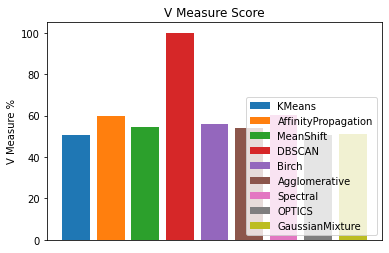

In [8]:
names = ["KMeans", "AffinityPropagation", "MeanShift", "DBSCAN", "Birch", "Agglomerative", "Spectral", "OPTICS", "GaussianMixture"]
algs = [KMeans(n_clusters=N_CLUSTERS, max_iter=500), AffinityPropagation(max_iter=500), MeanShift(n_jobs=5,max_iter=500), DBSCAN(n_jobs=5), Birch(n_clusters=N_CLUSTERS), AgglomerativeClustering(n_clusters=N_CLUSTERS), SpectralClustering(n_clusters=N_CLUSTERS), OPTICS(n_jobs=5), GaussianMixture(n_components=N_CLUSTERS)]
#this is for later

from sklearn.metrics.cluster import v_measure_score
def cluster(clusterAlg, strName, ii):
    print(f"Running: {strName}")
    clusterAlg.fit(train)
    plt.bar(ii, completeness_score(test_label, clusterAlg.fit_predict(test))*100,label=str(strName))



for i, alg in enumerate(algs):
    cluster(alg, names[i], i)


plt.title(f"V Measure Score")
plt.ylabel(f"V Measure %")
plt.legend(loc=4)
plt.tick_params(bottom = False, labelbottom=False)
plt.savefig(f"../graphs/Completeness-Score-N{N_CLUSTERS}-lda.png")

In [2]:
train, test, train_label, test_label = train_test_split(X, mnist.target, test_size=0.2, shuffle=True)

names = ["KMeans", "AffinityPropagation", "MeanShift", "DBSCAN", "Birch", "Agglomerative", "Spectral", "OPTICS", "GaussianMixture"]
algs = [KMeans(n_clusters=N_CLUSTERS, max_iter=500), AffinityPropagation(max_iter=500), MeanShift(n_jobs=5,max_iter=500), DBSCAN(n_jobs=5), Birch(n_clusters=N_CLUSTERS), AgglomerativeClustering(n_clusters=N_CLUSTERS), SpectralClustering(n_clusters=N_CLUSTERS), OPTICS(n_jobs=5), GaussianMixture(n_components=N_CLUSTERS)]
#this is for later

def cluster(clusterAlg, strName, ii):
    print(f"Running: {strName}")
    clusterAlg.fit(train)
    plt.bar(ii, completeness_score(test_label, clusterAlg.fit_predict(test))*100,label=str(strName))



for i, alg in enumerate(algs):
    cluster(alg, names[i], i)


plt.title(f"Cluster Completeness Score")
plt.ylabel(f"Completeness %")
plt.legend(loc=4)
plt.tick_params(bottom = False, labelbottom=False)
plt.savefig(f"../graphs/Cluster-Completeness-Score-unseen-N{N_CLUSTERS}.png")

Running: KMeans
Running: AffinityPropagation
Running: MeanShift
Running: DBSCAN
Running: Birch
Running: Agglomerative
Running: Spectral
Running: OPTICS
Running: GaussianMixture


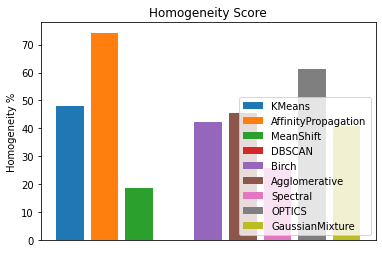

In [4]:
names = ["KMeans", "AffinityPropagation", "MeanShift", "DBSCAN", "Birch", "Agglomerative", "Spectral", "OPTICS", "GaussianMixture"]
algs = [KMeans(n_clusters=N_CLUSTERS, max_iter=500), AffinityPropagation(max_iter=500), MeanShift(n_jobs=5,max_iter=500), DBSCAN(n_jobs=5), Birch(n_clusters=N_CLUSTERS), AgglomerativeClustering(n_clusters=N_CLUSTERS), SpectralClustering(n_clusters=N_CLUSTERS), OPTICS(n_jobs=5), GaussianMixture(n_components=N_CLUSTERS)]
#this is for later

def cluster(clusterAlg, strName, ii):
    print(f"Running: {strName}")
    clusterAlg.fit(train)
    plt.bar(ii, homogeneity_score(test_label, clusterAlg.fit_predict(test))*100,label=str(strName))



for i, alg in enumerate(algs):
    cluster(alg, names[i], i)


plt.title(f"Homogeneity Score")
plt.ylabel(f"Homogeneity %")
plt.legend(loc=4)
plt.tick_params(bottom = False, labelbottom=False)
plt.savefig(f"../graphs/homogeneity-Completeness-Score-unseen-N{N_CLUSTERS}.png")

Running: KMeans
Running: AffinityPropagation
Running: MeanShift
Running: DBSCAN
Running: Birch
Running: Agglomerative
Running: Spectral
Running: OPTICS
Running: GaussianMixture


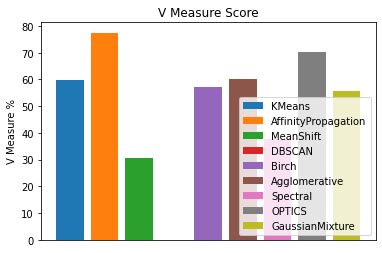

In [5]:
from sklearn.metrics.cluster import v_measure_score

names = ["KMeans", "AffinityPropagation", "MeanShift", "DBSCAN", "Birch", "Agglomerative", "Spectral", "OPTICS", "GaussianMixture"]
algs = [KMeans(n_clusters=N_CLUSTERS, max_iter=500), AffinityPropagation(max_iter=500), MeanShift(n_jobs=5,max_iter=500), DBSCAN(n_jobs=5), Birch(n_clusters=N_CLUSTERS), AgglomerativeClustering(n_clusters=N_CLUSTERS), SpectralClustering(n_clusters=N_CLUSTERS), OPTICS(n_jobs=5), GaussianMixture(n_components=N_CLUSTERS)]
#this is for later

def cluster(clusterAlg, strName, ii):
    print(f"Running: {strName}")
    clusterAlg.fit(train)
    plt.bar(ii, v_measure_score(test_label, clusterAlg.fit_predict(test))*100,label=str(strName))



for i, alg in enumerate(algs):
    cluster(alg, names[i], i)


plt.title(f"V Measure Score")
plt.ylabel(f"V Measure %")
plt.legend(loc=4)
plt.tick_params(bottom = False, labelbottom=False)
plt.savefig(f"../graphs/v-Completeness-Score-unseen-N{N_CLUSTERS}.png")

In [6]:
my_file_and_path = "./backpacktests/pickled_backpack.pklz"
with open(my_file_and_path, 'rb') as fh:
    mnist = pickle.load(fh)
pipe = Pipeline([('scaler', StandardScaler()), ('LDA', LDA(n_components=10))])
X = pipe.fit_transform(mnist.data, mnist.target)
X2 = pipe.fit_transform(mnist.backpack, mnist.targetBack)

names = ["KMeans", "AffinityPropagation", "MeanShift", "DBSCAN", "Birch", "Agglomerative", "Spectral", "OPTICS", "GaussianMixture"]
algs = [KMeans(n_clusters=N_CLUSTERS, max_iter=500), AffinityPropagation(max_iter=500), MeanShift(n_jobs=5,max_iter=500), DBSCAN(n_jobs=5), Birch(n_clusters=N_CLUSTERS), AgglomerativeClustering(n_clusters=N_CLUSTERS), SpectralClustering(n_clusters=N_CLUSTERS), OPTICS(n_jobs=5), GaussianMixture(n_components=N_CLUSTERS)]
#this is for later

def cluster(clusterAlg, strName, ii):
    print(f"Running: {strName}")
    clusterAlg.fit(X)
    plt.bar(ii, completeness_score(mnist.targetBack, clusterAlg.fit_predict(X2))*100,label=str(strName))



for i, alg in enumerate(algs):
    cluster(alg, names[i], i)


plt.title(f"Cluster Completeness Score With Backpacks")
plt.ylabel(f"Completeness %")
plt.legend(loc=4)
plt.tick_params(bottom = False, labelbottom=False)
plt.savefig(f"../graphs/Cluster-Completeness-Score-unseenbackpack-N{N_CLUSTERS}.png")

Running: KMeans
Running: AffinityPropagation
Running: MeanShift
Running: DBSCAN
Running: Birch
Running: Agglomerative
Running: Spectral
Running: OPTICS
Running: GaussianMixture


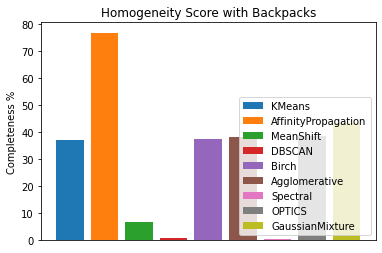

In [8]:
names = ["KMeans", "AffinityPropagation", "MeanShift", "DBSCAN", "Birch", "Agglomerative", "Spectral", "OPTICS", "GaussianMixture"]
algs = [KMeans(n_clusters=N_CLUSTERS, max_iter=500), AffinityPropagation(max_iter=500), MeanShift(n_jobs=5,max_iter=500), DBSCAN(n_jobs=5), Birch(n_clusters=N_CLUSTERS), AgglomerativeClustering(n_clusters=N_CLUSTERS), SpectralClustering(n_clusters=N_CLUSTERS), OPTICS(n_jobs=5), GaussianMixture(n_components=N_CLUSTERS)]
#this is for later

def cluster(clusterAlg, strName, ii):
    print(f"Running: {strName}")
    clusterAlg.fit(X)
    plt.bar(ii, homogeneity_score(mnist.targetBack, clusterAlg.fit_predict(X2))*100,label=str(strName))



for i, alg in enumerate(algs):
    cluster(alg, names[i], i)


plt.title(f"Homogeneity Score with Backpacks")
plt.ylabel(f"Completeness %")
plt.legend(loc=4)
plt.tick_params(bottom = False, labelbottom=False)
plt.savefig(f"../graphs/homogeneity-Completeness-Score-unseenbackpacks-N{N_CLUSTERS}.png")

Running: KMeans
Running: AffinityPropagation
Running: MeanShift
Running: DBSCAN
Running: Birch
Running: Agglomerative
Running: Spectral
Running: OPTICS
Running: GaussianMixture


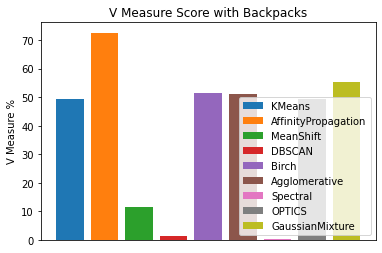

In [9]:
names = ["KMeans", "AffinityPropagation", "MeanShift", "DBSCAN", "Birch", "Agglomerative", "Spectral", "OPTICS", "GaussianMixture"]
algs = [KMeans(n_clusters=N_CLUSTERS, max_iter=500), AffinityPropagation(max_iter=500), MeanShift(n_jobs=5,max_iter=500), DBSCAN(n_jobs=5), Birch(n_clusters=N_CLUSTERS), AgglomerativeClustering(n_clusters=N_CLUSTERS), SpectralClustering(n_clusters=N_CLUSTERS), OPTICS(n_jobs=5), GaussianMixture(n_components=N_CLUSTERS)]
#this is for later

def cluster(clusterAlg, strName, ii):
    print(f"Running: {strName}")
    clusterAlg.fit(X)
    plt.bar(ii, v_measure_score(mnist.targetBack, clusterAlg.fit_predict(X2))*100,label=str(strName))



for i, alg in enumerate(algs):
    cluster(alg, names[i], i)


plt.title(f"V Measure Score with Backpacks")
plt.ylabel(f"V Measure %")
plt.legend(loc=4)
plt.tick_params(bottom = False, labelbottom=False)
plt.savefig(f"../graphs/v-Completeness-Score-unseenbackpacks-N{N_CLUSTERS}.png")

In [10]:
from sklearn.metrics.cluster import pair_confusion_matrix

a = AffinityPropagation(max_iter=500)
a.fit(X)
pair_confusion_matrix(mnist.targetBack, a.fit_predict(X2))

array([[438784,   6940],
       [ 10780,   9302]])